<a href="https://colab.research.google.com/github/kartik17jan-sketch/California-Housing-Price-Predicition/blob/main/Face_Recognition_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [2]:
#Load the images from dataset
lfw = fetch_lfw_people(min_faces_per_person=70, resize =0.5 , color=False)
#color=False --> grayscale images(1 channel instead of 3)

X = lfw.images
y = lfw.target
target_names = lfw.target_names
h,w = X.shape[1],X.shape[2]

print("Data shape:" ,X.shape)
print("Image size:" ,h,"x",w )
print("Number  of classes:", len(target_names))
print("Classes:",target_names)


Data shape: (1288, 62, 47)
Image size: 62 x 47
Number  of classes: 7
Classes: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42, stratify=y
)



In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#add channel dimensions: (h,w) -> (h,w,1)
X_train = X_train[..., np.newaxis]
X_test = X_test[...,np.newaxis]

print("Train:", X_train.shape,y_train.shape)
print("Train:", X_test.shape, y_test.shape)


Train: (1030, 62, 47, 1) (1030,)
Train: (258, 62, 47, 1) (258,)


<function matplotlib.pyplot.show(close=None, block=None)>

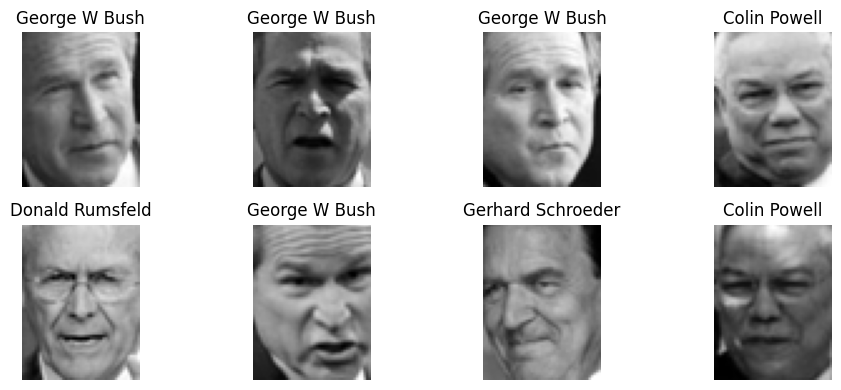

In [5]:
plt.figure(figsize=(10,4))
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(X_train[i].reshape(h,w),cmap='gray')
  plt.title(target_names[y_train[i]])
  plt.axis('off')
plt.tight_layout()
plt.show

In [6]:
num_classes = len(target_names)
#32, (3,3) --> 32 FILTERS
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(h,w,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 45, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,147,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,166,727 (4.45 MB)

 Trainable params: 1,166,727 (4.45 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train,y_train,
                  epochs=15, batch_size=32,
                  validation_data=(X_test, y_test))

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.3955 - loss: 1.8052 - val_accuracy: 0.4109 - val_loss: 1.7172
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.4371 - loss: 1.7133 - val_accuracy: 0.4109 - val_loss: 1.6846
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.4030 - loss: 1.7089 - val_accuracy: 0.4109 - val_loss: 1.6890
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.4024 - loss: 1.7306 - val_accuracy: 0.4109 - val_loss: 1.6943
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.3979 - loss: 1.7239 - val_accuracy: 0.4109 - val_loss: 1.6896
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.4022 - loss: 1.7210 - val_accuracy: 0.4109 - val_loss: 1.6865
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.4223 - loss: 1.6780 - val_accuracy: 0.4109 - val_loss: 1.6831
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.4197 - loss: 1.7096 - val_accuracy: 0.

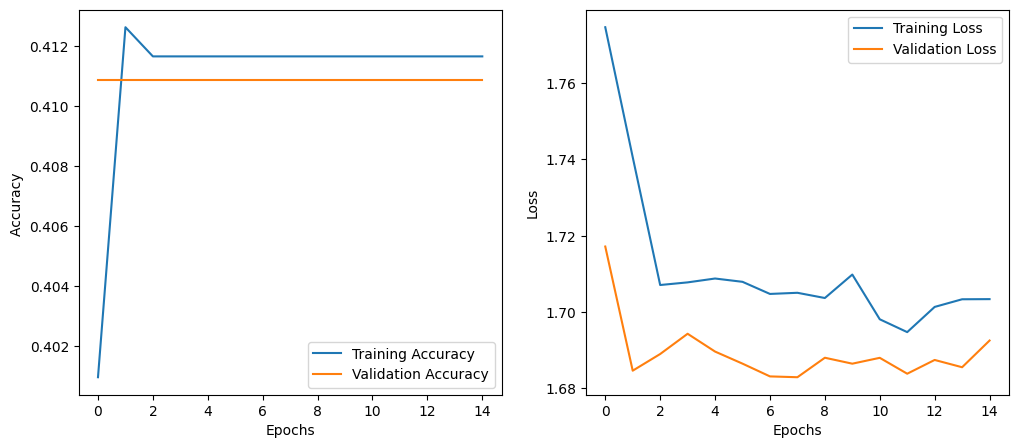

In [9]:
plt.figure(figsize=(12,5))

#Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history .history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy ')
plt.legend()

#Loss
plt.subplot(1,2,2)
plt.plot(history .history['loss'],label='Training Loss')
plt.plot(history .history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#If train accuracy ↑ and val accuracy ↑ → good learning.
#If train acc is high but val acc is low → overfitting.
#If both low → underfitting (model too simple or not enough epochs).
#Loss plots show the same pattern: you want both train & val loss to go down.

In [10]:
test_loss,test_acc = model.evaluate(X_test, y_test,verbose=0)

In [11]:
print(f"Test Accuracy : {test_acc:.3f}")

Test Accuracy : 0.411


In [12]:
y_pred = np.argmax(model.predict(X_test),axis=1)
print(classification_report(y_test,y_pred,target_names=target_names))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       0.00      0.00      0.00        47
  Donald Rumsfeld       0.00      0.00      0.00        24
    George W Bush       0.41      1.00      0.58       106
Gerhard Schroeder       0.00      0.00      0.00        22
      Hugo Chavez       0.00      0.00      0.00        14
       Tony Blair       0.00      0.00      0.00        29

         accuracy                           0.41       258
        macro avg       0.06      0.14      0.08       258
     weighted avg       0.17      0.41      0.24       258



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


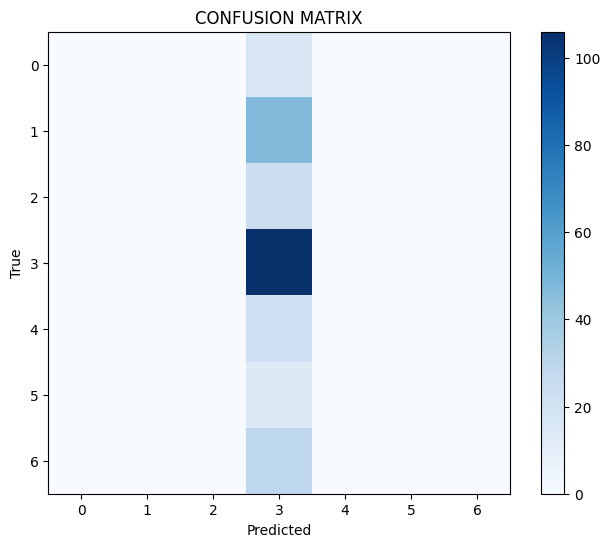

In [13]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm,cmap='Blues')
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()

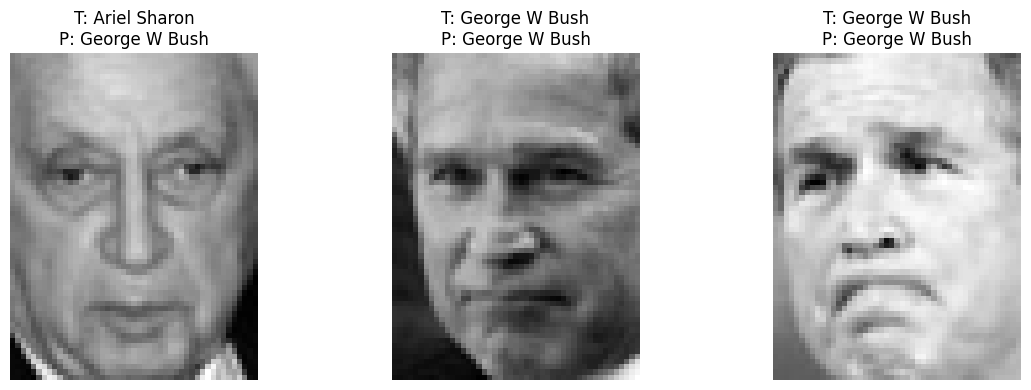

In [14]:
plt.figure(figsize=(12,4))

for i in range(3):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx].reshape(h, w)
    true = target_names[y_test[idx]]
    pred = target_names[y_pred[idx]]

    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T: {true}\nP: {pred}")
    plt.axis("off")

plt.tight_layout()
plt.show()
